In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy to obtain cities from lat and long
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

620

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2075a61b97e9dfc66fa3ba5f897a45dc


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Records {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Records 1 of Set 1 | bhikangaon
Processing Records 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Records 3 of Set 1 | willowmore
Processing Records 4 of Set 1 | nantucket
Processing Records 5 of Set 1 | bereda
Processing Records 6 of Set 1 | the valley
Processing Records 7 of Set 1 | adeje
Processing Records 8 of Set 1 | esteli
Processing Records 9 of Set 1 | salalah
Processing Records 10 of Set 1 | avera
Processing Records 11 of Set 1 | bajo baudo
City not found. Skipping...
Processing Records 12 of Set 1 | dhidhdhoo
Processing Records 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Records 14 of Set 1 | punta arenas
Processing Records 15 of Set 1 | barentu
Processing Records 16 of Set 1 | camacha
Processing Records 17 of Set 1 | castro
Processing Records 18 of Set 1 | ushuaia
Processing Records 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Records 20 of Set 1 | tas

Processing Records 31 of Set 4 | ngama
City not found. Skipping...
Processing Records 32 of Set 4 | skreia
Processing Records 33 of Set 4 | nogliki
Processing Records 34 of Set 4 | rengo
Processing Records 35 of Set 4 | richards bay
Processing Records 36 of Set 4 | avarua
Processing Records 37 of Set 4 | barrow
Processing Records 38 of Set 4 | kigorobya
Processing Records 39 of Set 4 | port lincoln
Processing Records 40 of Set 4 | dunedin
Processing Records 41 of Set 4 | adrar
Processing Records 42 of Set 4 | namibe
Processing Records 43 of Set 4 | warwick
Processing Records 44 of Set 4 | svetlaya
Processing Records 45 of Set 4 | whitehorse
Processing Records 46 of Set 4 | georgetown
Processing Records 47 of Set 4 | jumla
Processing Records 48 of Set 4 | maryanovka
City not found. Skipping...
Processing Records 49 of Set 4 | cam ranh
Processing Records 50 of Set 4 | labuhan
Processing Records 1 of Set 5 | saint-philippe
Processing Records 2 of Set 5 | tuktoyaktuk
Processing Records 3 o

City not found. Skipping...
Processing Records 12 of Set 8 | cidreira
Processing Records 13 of Set 8 | anito
Processing Records 14 of Set 8 | warqla
City not found. Skipping...
Processing Records 15 of Set 8 | bogotol
Processing Records 16 of Set 8 | aykhal
Processing Records 17 of Set 8 | vao
Processing Records 18 of Set 8 | thanh hoa
Processing Records 19 of Set 8 | kunnamangalam
Processing Records 20 of Set 8 | normandin
Processing Records 21 of Set 8 | doka
Processing Records 22 of Set 8 | san patricio
Processing Records 23 of Set 8 | hobyo
Processing Records 24 of Set 8 | buchanan
Processing Records 25 of Set 8 | anori
Processing Records 26 of Set 8 | flin flon
Processing Records 27 of Set 8 | yuncheng
Processing Records 28 of Set 8 | goya
Processing Records 29 of Set 8 | saint-augustin
Processing Records 30 of Set 8 | merauke
Processing Records 31 of Set 8 | imbituba
Processing Records 32 of Set 8 | sabang
Processing Records 33 of Set 8 | krasnoselkup
City not found. Skipping...


City not found. Skipping...
Processing Records 46 of Set 11 | mananara
City not found. Skipping...
Processing Records 47 of Set 11 | dalvik
Processing Records 48 of Set 11 | saint anthony
Processing Records 49 of Set 11 | zaysan
Processing Records 50 of Set 11 | kazalinsk
City not found. Skipping...
Processing Records 1 of Set 12 | kusk
City not found. Skipping...
Processing Records 2 of Set 12 | dromolaxia
Processing Records 3 of Set 12 | tahe
Processing Records 4 of Set 12 | beloha
Processing Records 5 of Set 12 | san juan
Processing Records 6 of Set 12 | teguldet
Processing Records 7 of Set 12 | solovetskiy
City not found. Skipping...
Processing Records 8 of Set 12 | louisbourg
City not found. Skipping...
Processing Records 9 of Set 12 | pundaguitan
Processing Records 10 of Set 12 | balozi
Processing Records 11 of Set 12 | brigantine
Processing Records 12 of Set 12 | zhuhai
Processing Records 13 of Set 12 | manono
Processing Records 14 of Set 12 | kununurra
Processing Records 15 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bhikangaon,21.87,75.96,58.48,55,0,6.85,IN,2020-01-06 02:15:03
1,Willowmore,-33.30,23.49,57.74,79,100,2.91,ZA,2020-01-06 02:15:05
2,Nantucket,41.28,-70.10,35.60,55,1,10.29,US,2020-01-06 02:12:03
3,Bereda,43.27,-7.54,41.00,100,75,8.05,ES,2020-01-06 02:15:06
4,The Valley,18.22,-63.06,78.80,74,20,8.05,AI,2020-01-06 02:10:51
5,Adeje,5.68,5.76,73.20,69,96,1.97,NG,2020-01-06 02:15:08
6,Esteli,13.09,-86.35,71.08,74,0,6.91,NI,2020-01-06 02:15:08
7,Salalah,17.01,54.10,75.20,78,75,3.36,OM,2020-01-06 02:15:09
8,Avera,33.19,-82.53,46.00,80,1,7.47,US,2020-01-06 02:15:09
9,Dhidhdhoo,6.88,73.10,82.24,77,31,11.65,MV,2020-01-06 02:13:43


In [11]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bhikangaon,IN,2020-01-06 02:15:03,21.87,75.96,58.48,55,0,6.85
1,Willowmore,ZA,2020-01-06 02:15:05,-33.30,23.49,57.74,79,100,2.91
2,Nantucket,US,2020-01-06 02:12:03,41.28,-70.10,35.60,55,1,10.29
3,Bereda,ES,2020-01-06 02:15:06,43.27,-7.54,41.00,100,75,8.05
4,The Valley,AI,2020-01-06 02:10:51,18.22,-63.06,78.80,74,20,8.05
5,Adeje,NG,2020-01-06 02:15:08,5.68,5.76,73.20,69,96,1.97
6,Esteli,NI,2020-01-06 02:15:08,13.09,-86.35,71.08,74,0,6.91
7,Salalah,OM,2020-01-06 02:15:09,17.01,54.10,75.20,78,75,3.36
8,Avera,US,2020-01-06 02:15:09,33.19,-82.53,46.00,80,1,7.47
9,Dhidhdhoo,MV,2020-01-06 02:13:43,6.88,73.10,82.24,77,31,11.65


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'01/05/20'

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

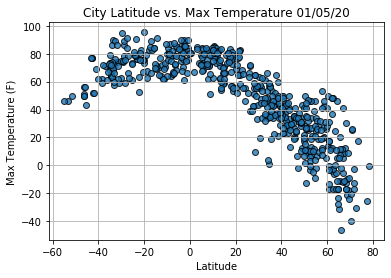

In [15]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

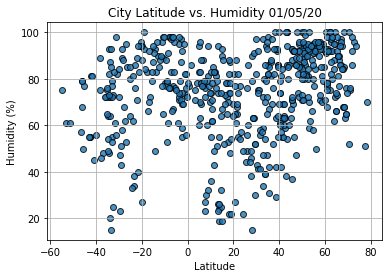

In [16]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

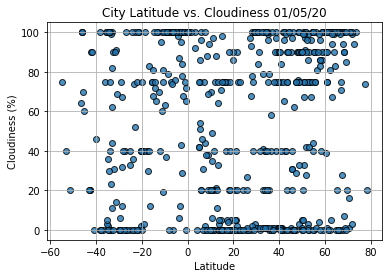

In [17]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

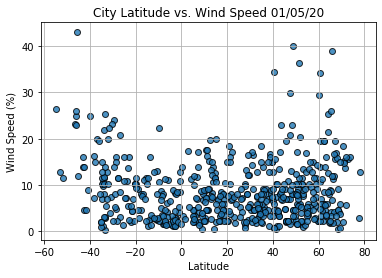

In [18]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [19]:
# Import linear regression from the scipy stats module
from scipy.stats import linregress

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bhikangaon,IN,2020-01-06 02:15:03,21.87,75.96,58.48,55,0,6.85
2,Nantucket,US,2020-01-06 02:12:03,41.28,-70.10,35.60,55,1,10.29
3,Bereda,ES,2020-01-06 02:15:06,43.27,-7.54,41.00,100,75,8.05
4,The Valley,AI,2020-01-06 02:10:51,18.22,-63.06,78.80,74,20,8.05
5,Adeje,NG,2020-01-06 02:15:08,5.68,5.76,73.20,69,96,1.97


In [41]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

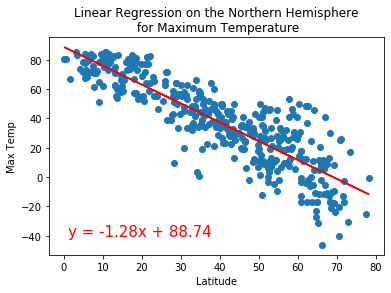

In [48]:
# Linear regression on Northern Hemisphere Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(1,-40))

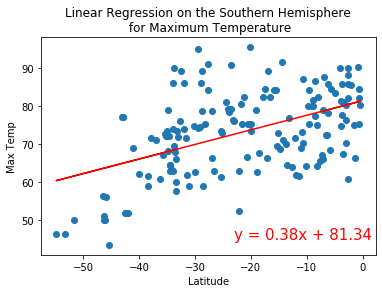

In [55]:
# Linear regression on southern Hemisphere for Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-23,45))

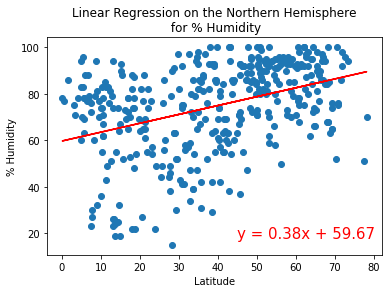

In [59]:
# Linear regression on Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Humidity', 
                       '% Humidity',(45,18))

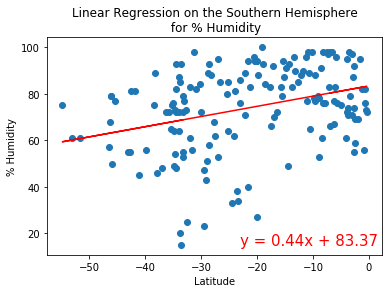

In [66]:
# Linear regression on southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Humidity', 
                       '% Humidity',(-23,15))

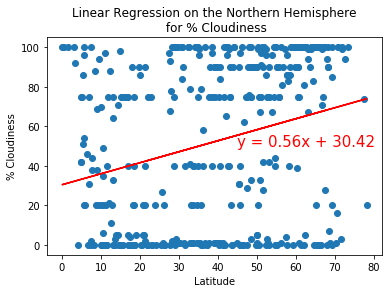

In [70]:
# Linear regression on Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(45,50))

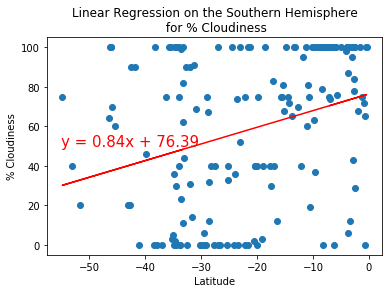

In [76]:
# Linear regression on southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(-55,50))

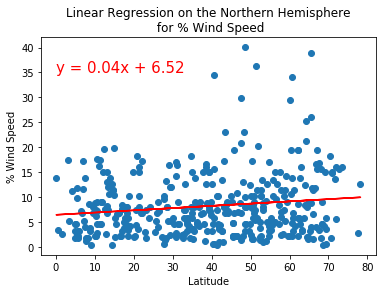

In [78]:
# Linear regression on northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Wind Speed', 
                       '% Wind Speed',(0,35))

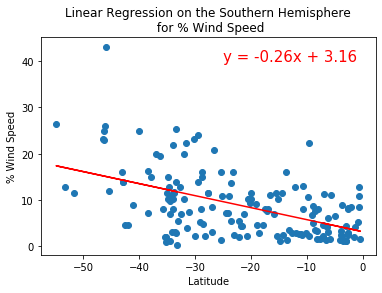

In [83]:
# Linear regression on southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Wind Speed', 
                       '% Wind Speed',(-25,40))